# ECE-GY 5373 Lab 4 Report (gk1675)

In [1]:
run ../styles.ipynb

## 4.5 A simple router experiment

- Drawing of the topology

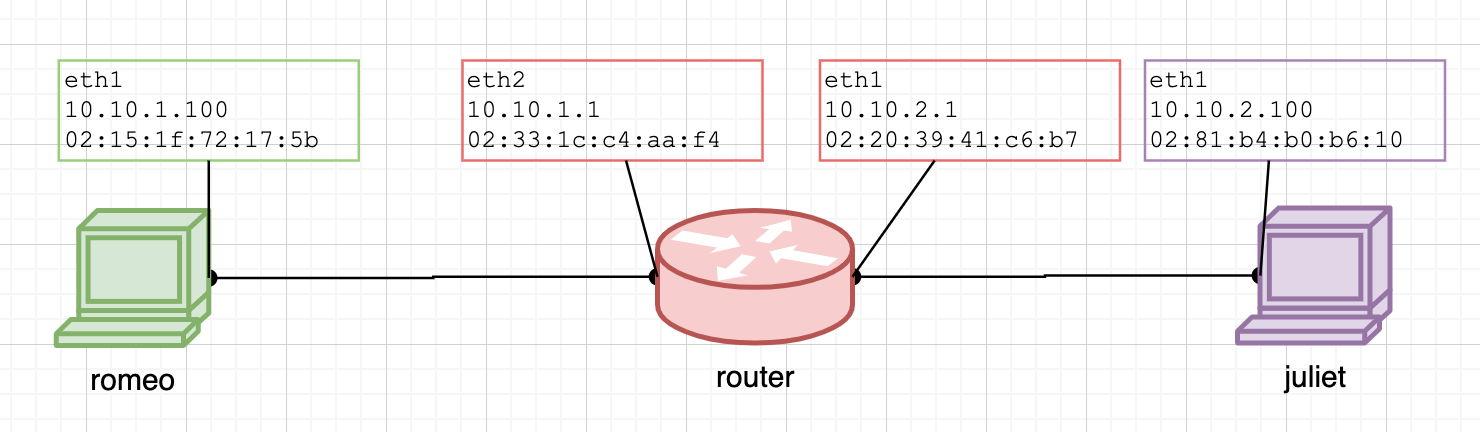

02:15:1f:72:17:5b
02:81:b4:b0:b6:10

### Exercise 1

Add route to routing table:     
`sudo route add -net 10.10.2.0/24 gw 10.10.1.1` on Romeo,   
`sudo route add -net 10.10.1.0/24 gw 10.10.2.1` on Juliet,   

- Routing table on Romeo:

Add to routing table: 
`sudo route add -net 10.10.2.0/24 gw 10.10.1.1`

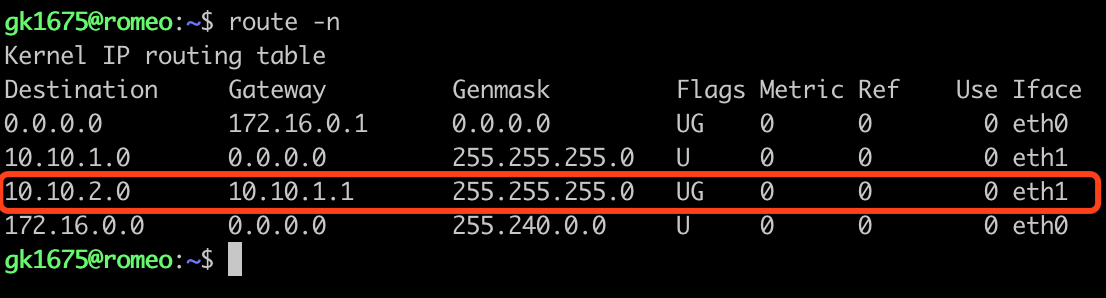

- Routing table on Router:

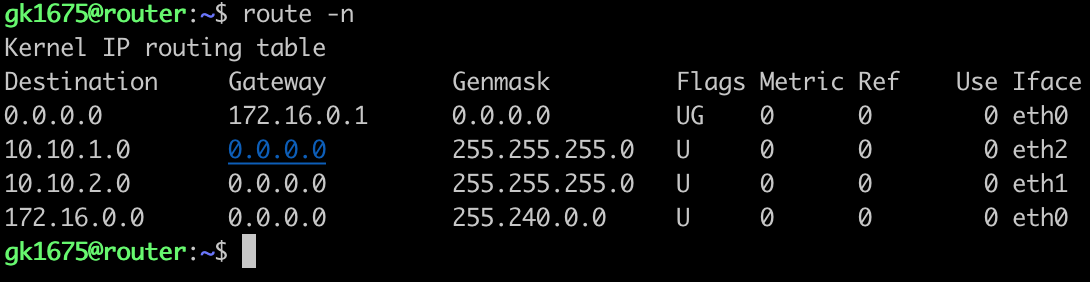

- Routing table on Juliet:

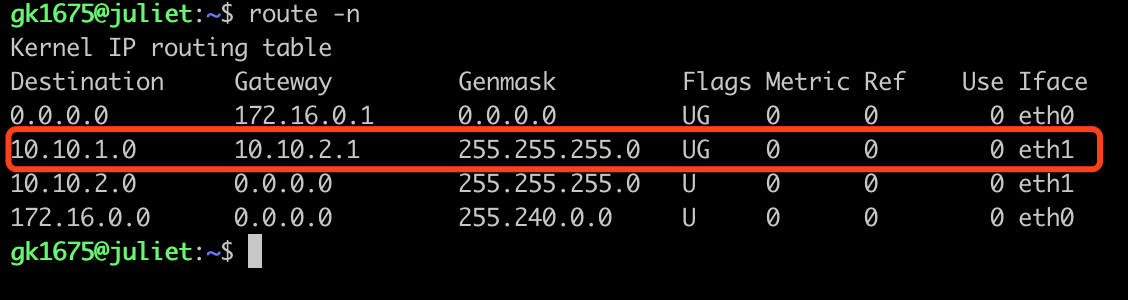

Copy .pcap file to local machine:    
`scp -i ~/.ssh/id_rsa -P 25211 gk1675@pc2.lan.sdn.uky.edu:/users/gk1675/romeo-static.pcap .`     
`scp -i ~/.ssh/id_rsa -P 25210 gk1675@pc2.lan.sdn.uky.edu:/users/gk1675/juliet-static.pcap .`    
`scp -i ~/.ssh/id_rsa -P 25212 gk1675@pc2.lan.sdn.uky.edu:/users/gk1675/router-static.pcap .`    

Q: When a packet was sent to a workstation in the other subnet, explain how the source and destination Ethernet addresses were changed.
- What are the source and destination addresses in the IP and Ethernet headers of a packet that went from the "romeo" machine to the router?

 
|  | IP header address | Ethernet header address |
|---|---|---|
|source | 10.10.1.100 | 02:15:1f:72:17:5b |
|destination|   10.10.2.100  |  02:33:1c:c4:aa:f4 |

- What are the source and destination addresses in the IP and Ethernet headers of a packet that went from the router to the "juliet" machine?

 
|  | IP header address | Ethernet header address |
|---|---|---|
|source  |  10.10.1.100	  |  02:20:39:41:c6:b7 |
|destination | 10.10.2.100 | 02:81:b4:b0:b6:10 |

- What are the source and destination addresses in the IP and Ethernet headers of a packet that went from  the router to "romeo" ?

|  | IP header address | Ethernet header address |
|---|---|---|
|source |   10.10.2.100  |  02:33:1c:c4:aa:f4 |
|destination | 10.10.1.100 | 02:15:1f:72:17:5b |

- What are the source and destination addresses in the IP and Ethernet headers of a packet that went from "juliet" to the router?

|  | IP header address | Ethernet header address |
|---|---|---|
|source | 10.10.2.100 |  02:81:b4:b0:b6:10 |
|destination|   10.10.1.100  |  02:20:39:41:c6:b7 |

Q: compare the behavior of the bridge in last week's experiment (with respect to the packet headers) to the behavior of the router in this week's experiment.

| | bridge | router |
|---|---|---|
| layer | data link layer | netowrk layer|
| scan or study | MAC address | IP address |
| working scope | single broadcast domain | more than one broadcast domain |
| connect or join | LANs | LANs and WAN |
| store and forward | frames | packets |
| transparency | protocol independent | protocol dependent |

## 4.6 RIP Exercise

Topology of hosts

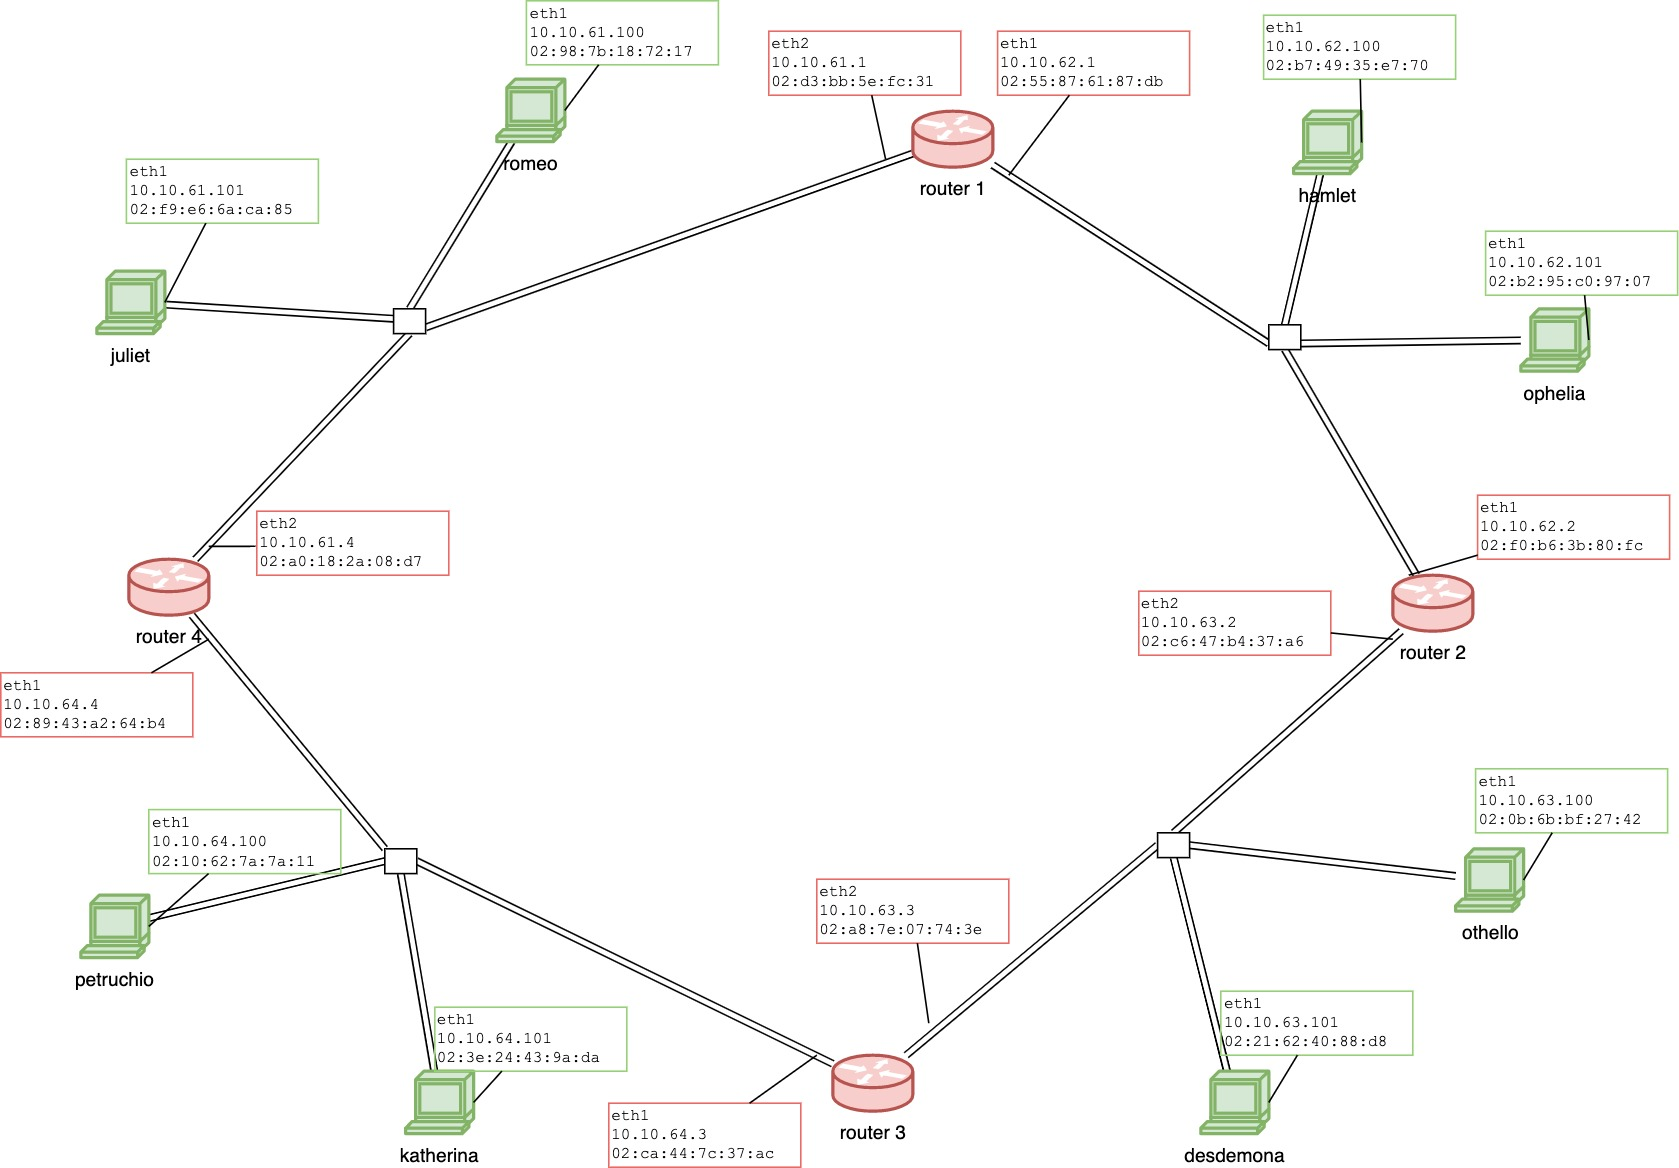

original routing table of routers

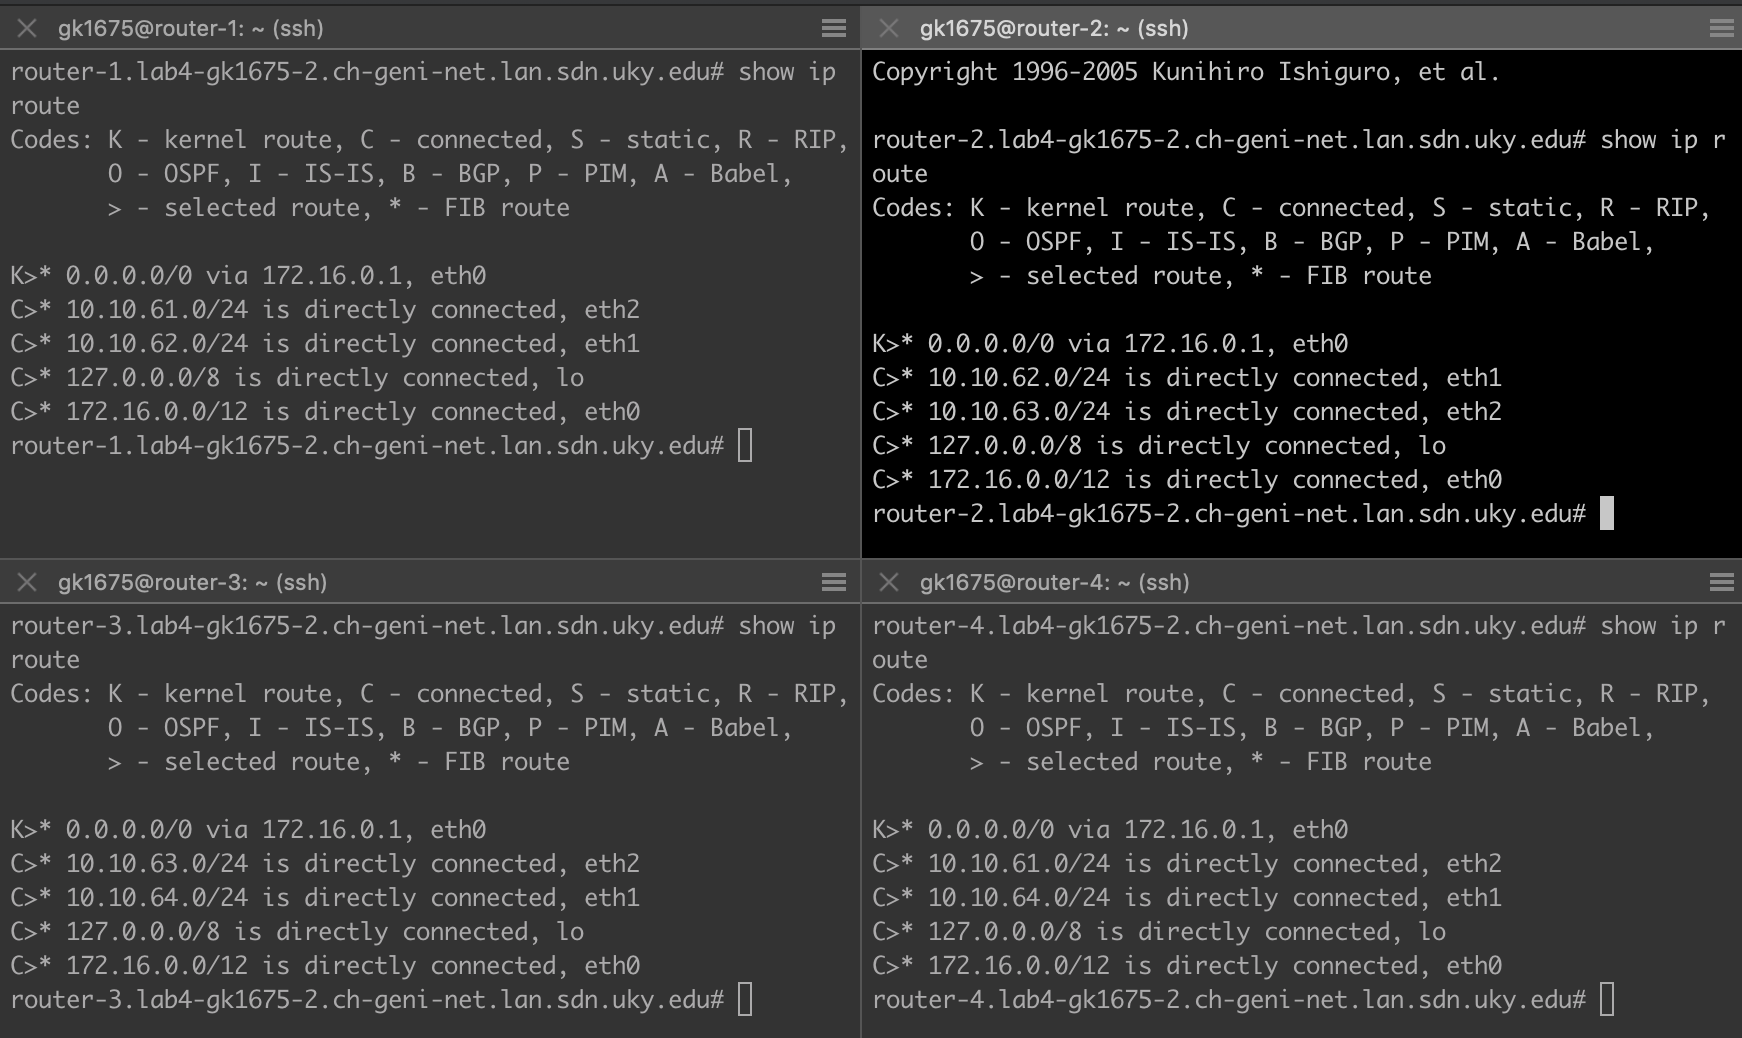

routing table of routers after adding RIP routing

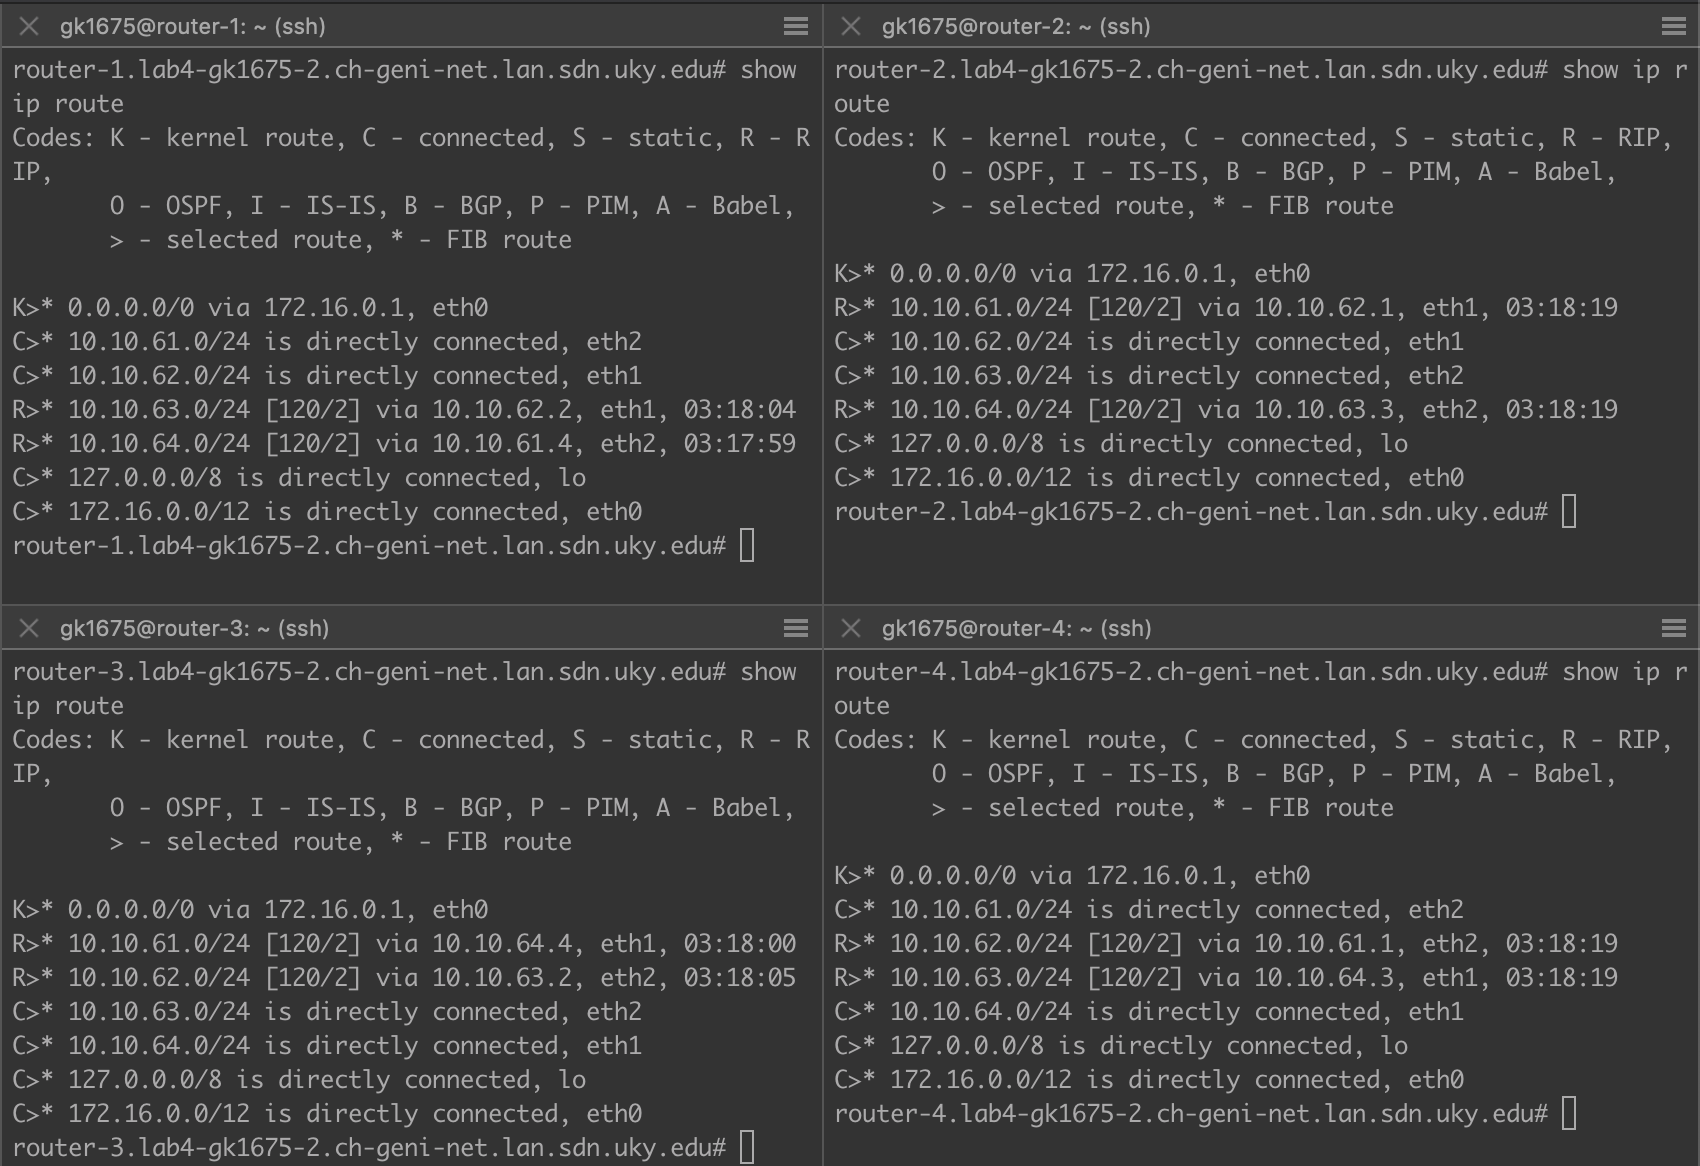

routing table on 8 workstations

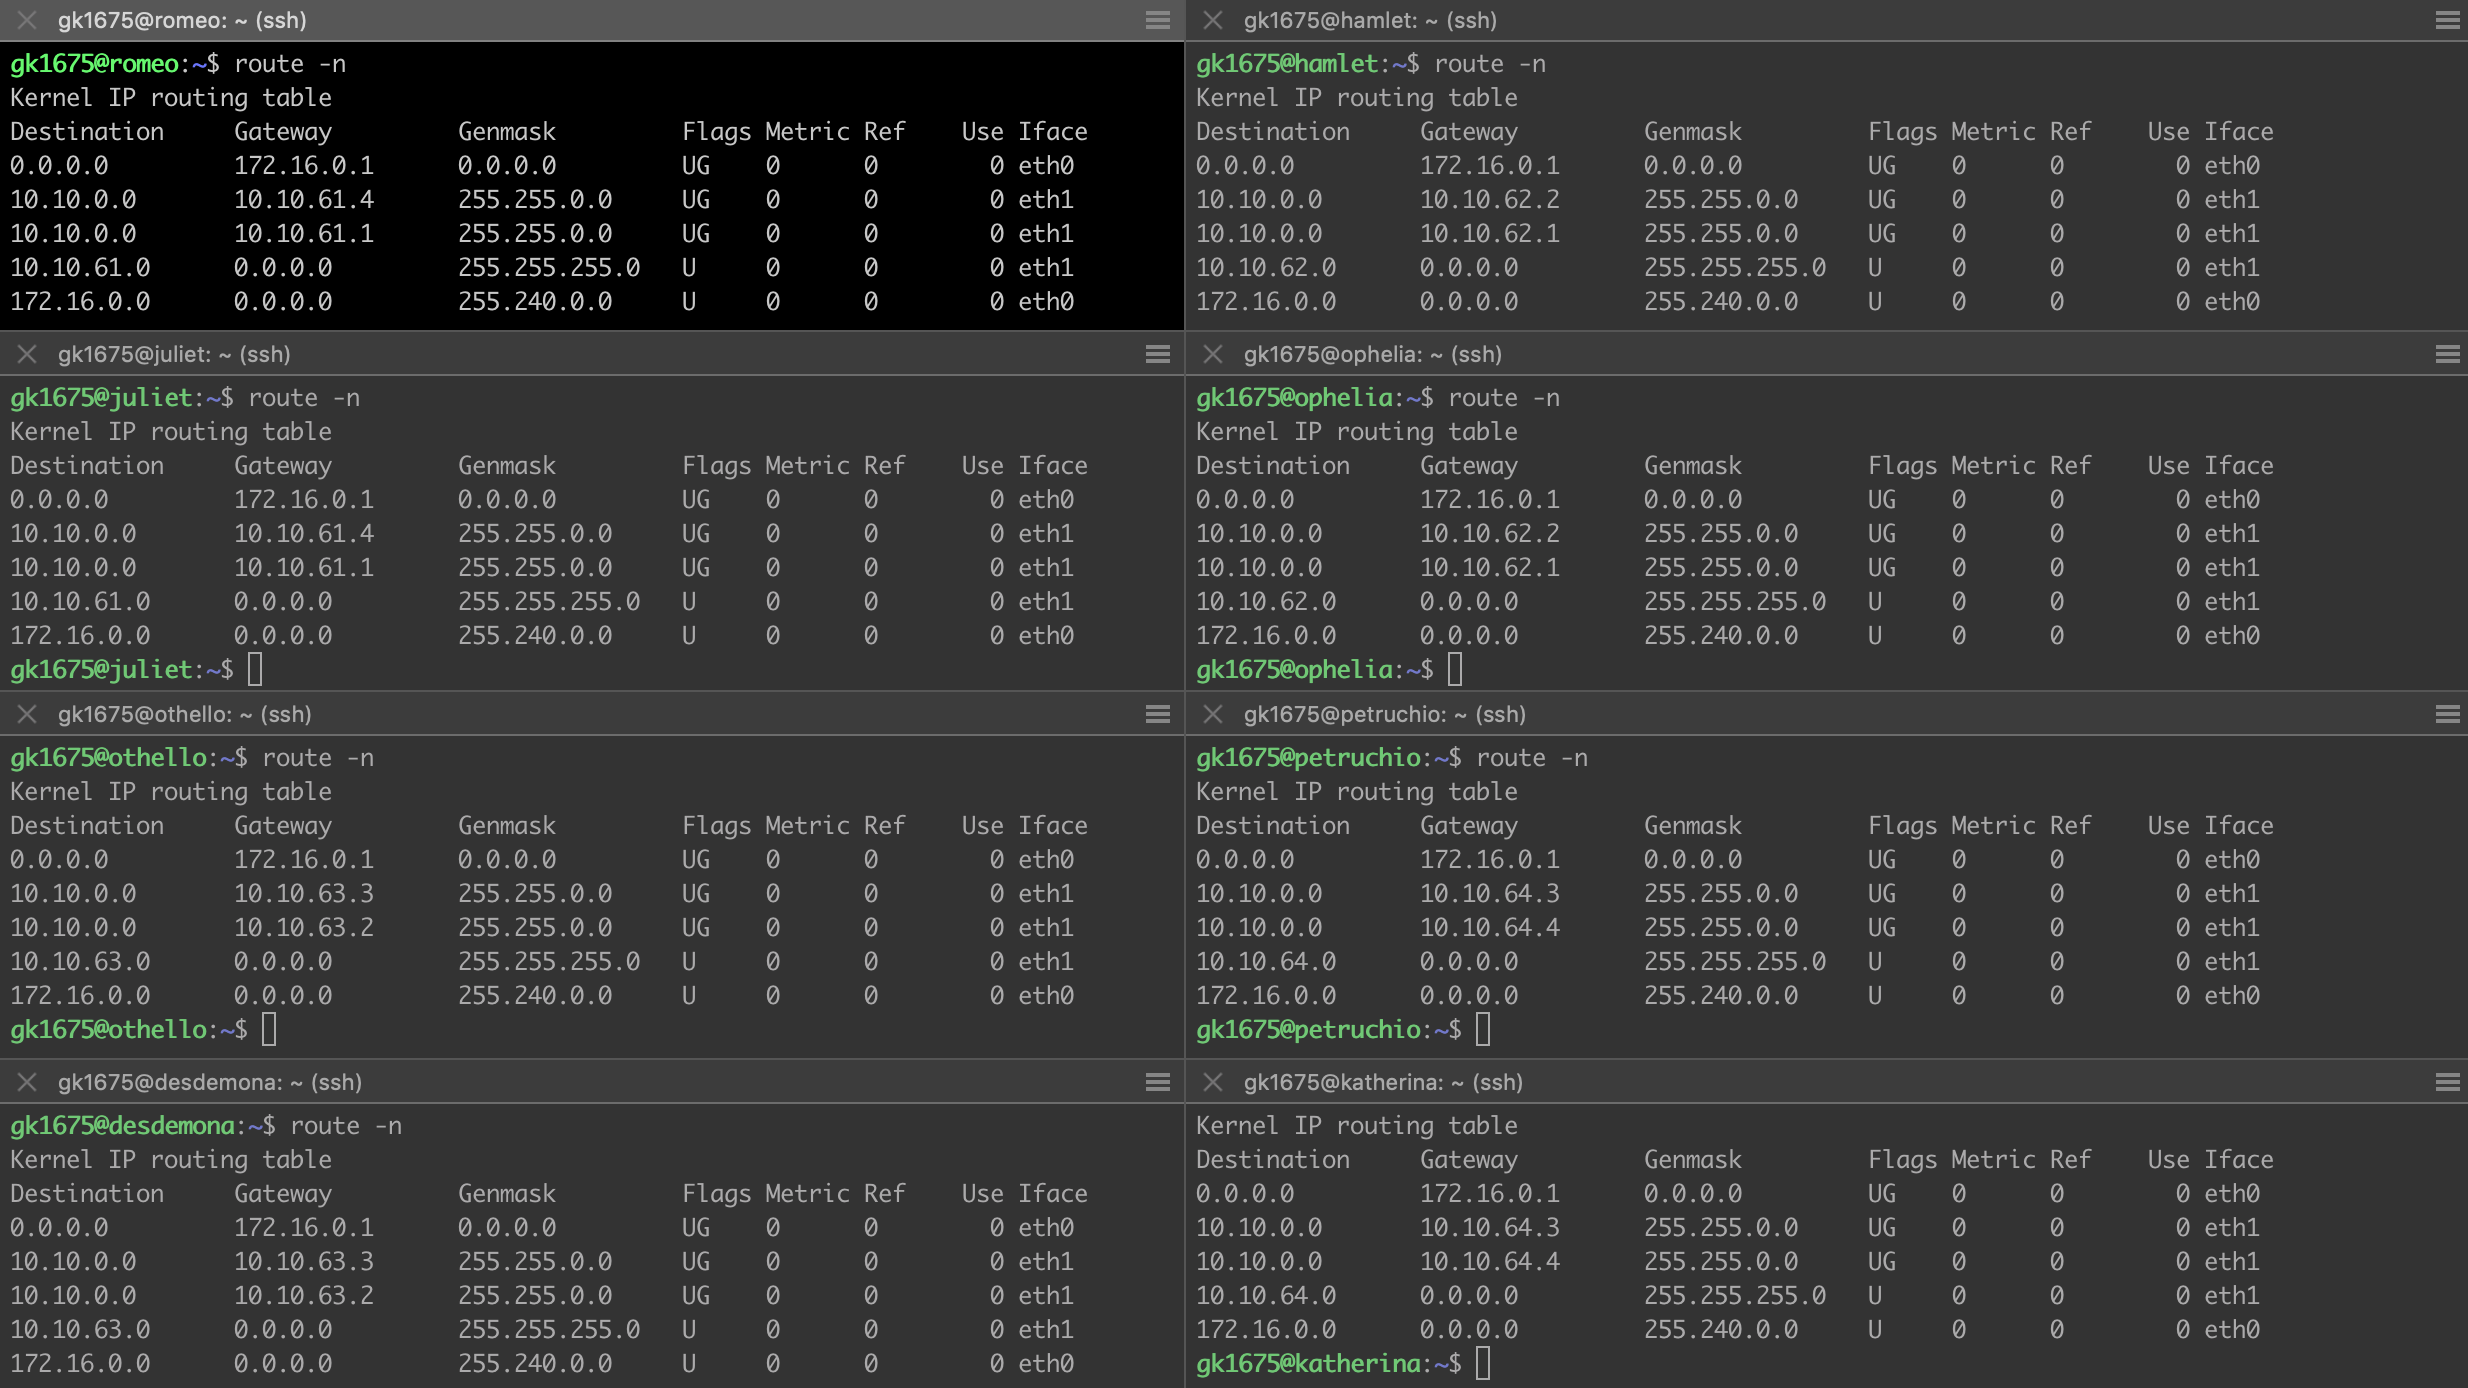

Copy .pcap file from "romeo" to local machine:
`scp -i ~/.ssh/id_rsa -P 26611 gk1675@pc3.lan.sdn.uky.edu:/users/gk1675/romeo-rip.pcap .`

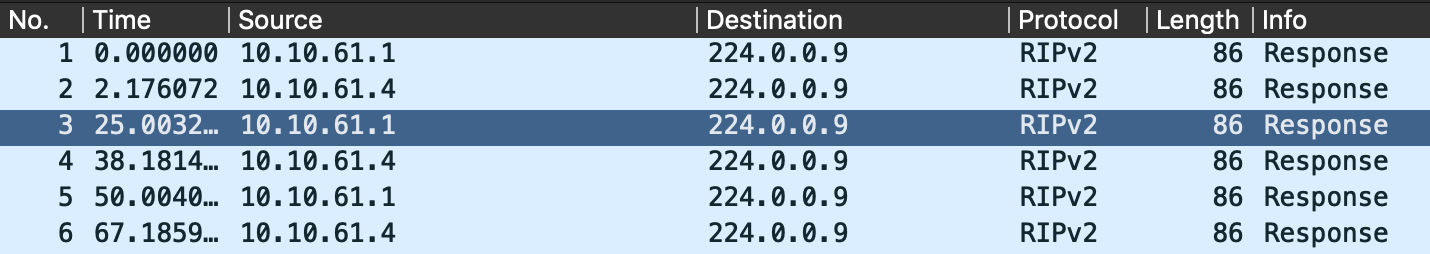

Q:  Explain why you can only get two different RIP messages in your subnet. Was a RIP packet forwarded by the routers? Why?

A: Because the host "romeo" has 2 routers connected, 10.10.61.1 and 10.10.61.4. Each router send message to its neighors, so "romeo" can receive RIP messages from router-1 and router-4. Yes, because routers need to inform their neighbor routers about the cost metrics information.

Q: Draw the format of one of the saved RIP response packets from your, including the IP and UDP headers and the RIP message (see Figs 0.13, 0.14, and 4.4). Identify each field, and express their values in decimal format. For each of the other seven unique RIP response packets collected, explain the contents of the RIP messages only, excluding IP and UDP headers.

A:   

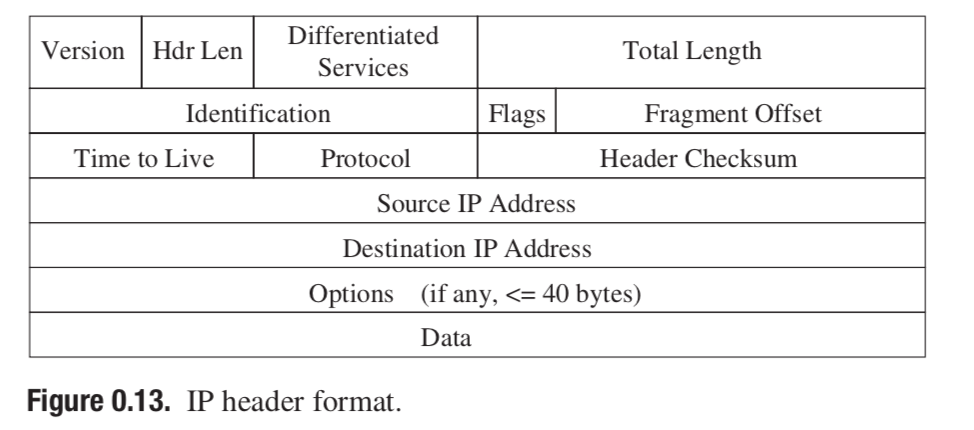

IP header:
- header length: 4 bits
- total length: 16bits
- time to live: 8bits
- protocol: UDP
- source IP address: 32 bits
- destination IP address:  32 bits

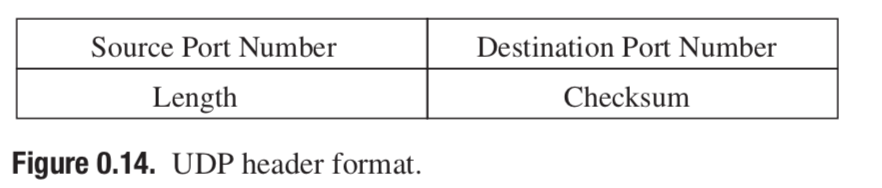

UDP header:
- source port number: 520 (router)
- destination port number: 520 (router)
- length: 52 bits

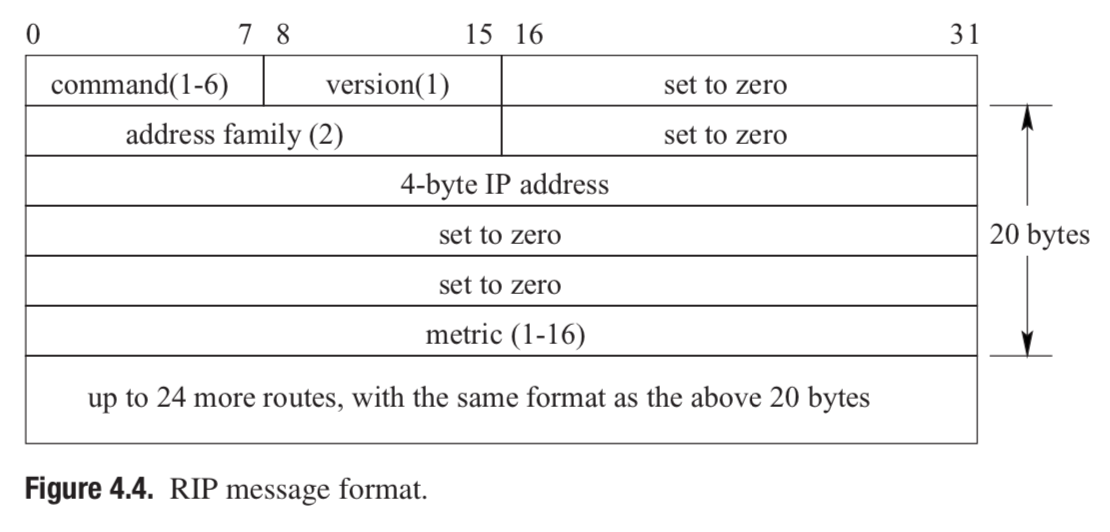

RIP header:
- command: response (2)
- address family identifier: 2 (IP)
- IP address: 10.10.61.4
- metric: 2

Content of RIP messages:
- command, version, address family, IP address, metric.

Q: Draw the distance tables and the routing tables in the routers based on Fig. 4.11, assuming that number of hops is used as the metric. Verify the routing tables using the RIP messages you captured.

Router 1
    - distance table:

|  | cost via router-2 | cost via router-4 | 
| --- | --- | --- |
| 10.10.61.0| 1 | 1 |
| 10.10.62.0| 1 | 1 |
| 10.10.63.0| 2 | 2 |
| 10.10.64.0| 2 | 2 |

    - routing table
    
|  | router | metric | 
| --- | --- | --- |
| 10.10.61.0| - | 1 |
| 10.10.62.0| - | 1 |
| 10.10.63.0| router-2 | 2 |
| 10.10.64.0| router-4 | 2 |

Router 2
    - distance table:

|  | cost via router-2 | cost via router-4 | 
| --- | --- | --- |
| 10.10.61.0| 2 | 2 |
| 10.10.62.0| 1 | 1 |
| 10.10.63.0| 1 | 1 |
| 10.10.64.0| 2 | 2 |

    - routing table
    
|  | router | metric | 
| --- | --- | --- |
| 10.10.61.0| router-1 | 2 |
| 10.10.62.0| - | 1 |
| 10.10.63.0| - | 1 |
| 10.10.64.0| router-3 | 2 |

Router 3
    - distance table:

|  | cost via router-2 | cost via router-4 | 
| --- | --- | --- |
| 10.10.61.0| 2 | 2 |
| 10.10.62.0| 2 | 2 |
| 10.10.63.0| 1 | 1 |
| 10.10.64.0| 1 | 1 |

    - routing table
    
|  | router | metric | 
| --- | --- | --- |
| 10.10.61.0| router-1 | 2 |
| 10.10.62.0| router-4 | 2 |
| 10.10.63.0| - | 1 |
| 10.10.64.0| - | 1 |

Router 4
    - distance table:

|  | cost via router-2 | cost via router-4 | 
| --- | --- | --- |
| 10.10.61.0| 1 | 1 |
| 10.10.62.0| 2 | 2 |
| 10.10.63.0| 2 | 2 |
| 10.10.64.0| 1 | 1 |

    - routing table
    
|  | router | metric | 
| --- | --- | --- |
| 10.10.61.0| - | 1 |
| 10.10.62.0| router-1 | 2 |
| 10.10.63.0| router-3 | 2 |
| 10.10.64.0| - | 1 |

### Exercise 3

routing table before cutting down router-1 and router-2 connection

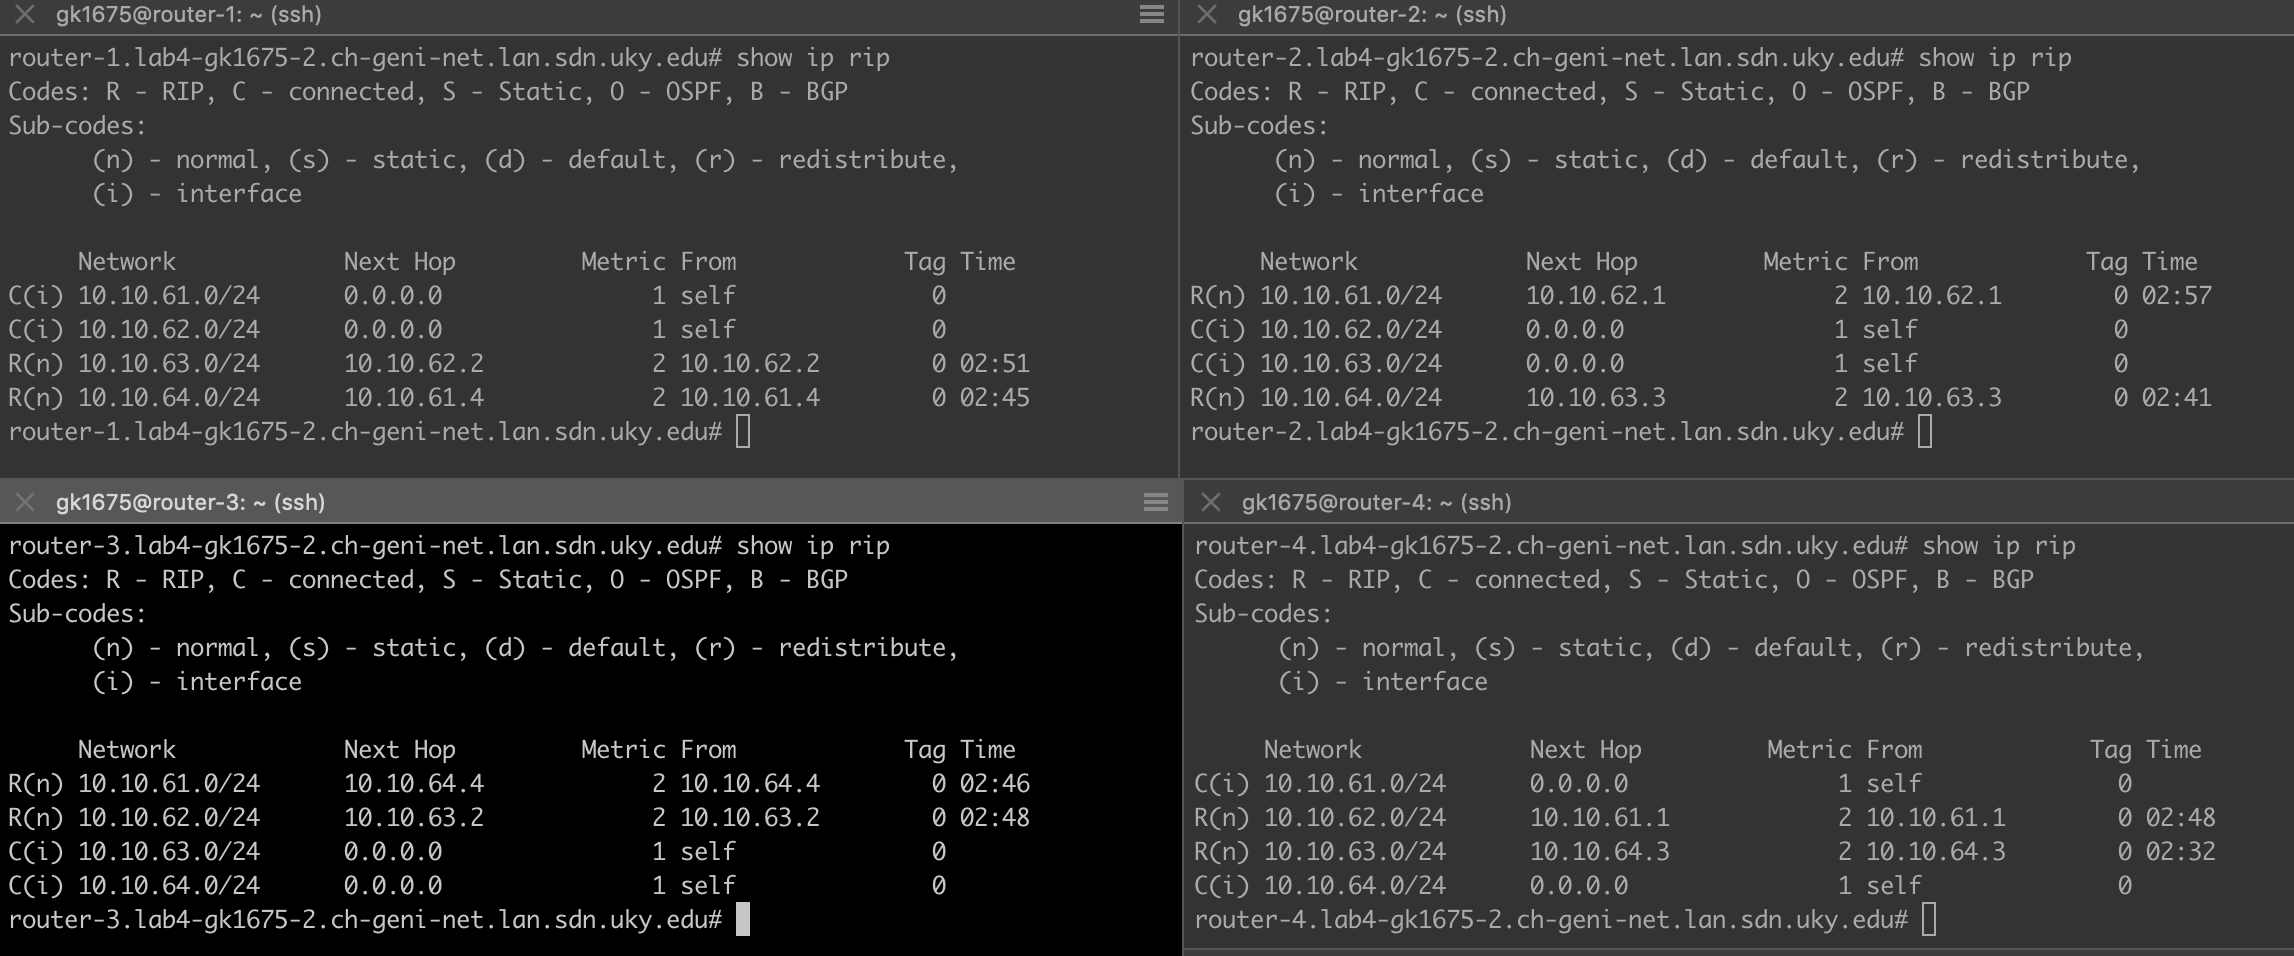

routing table after cutting down router-1 and router-2 connection

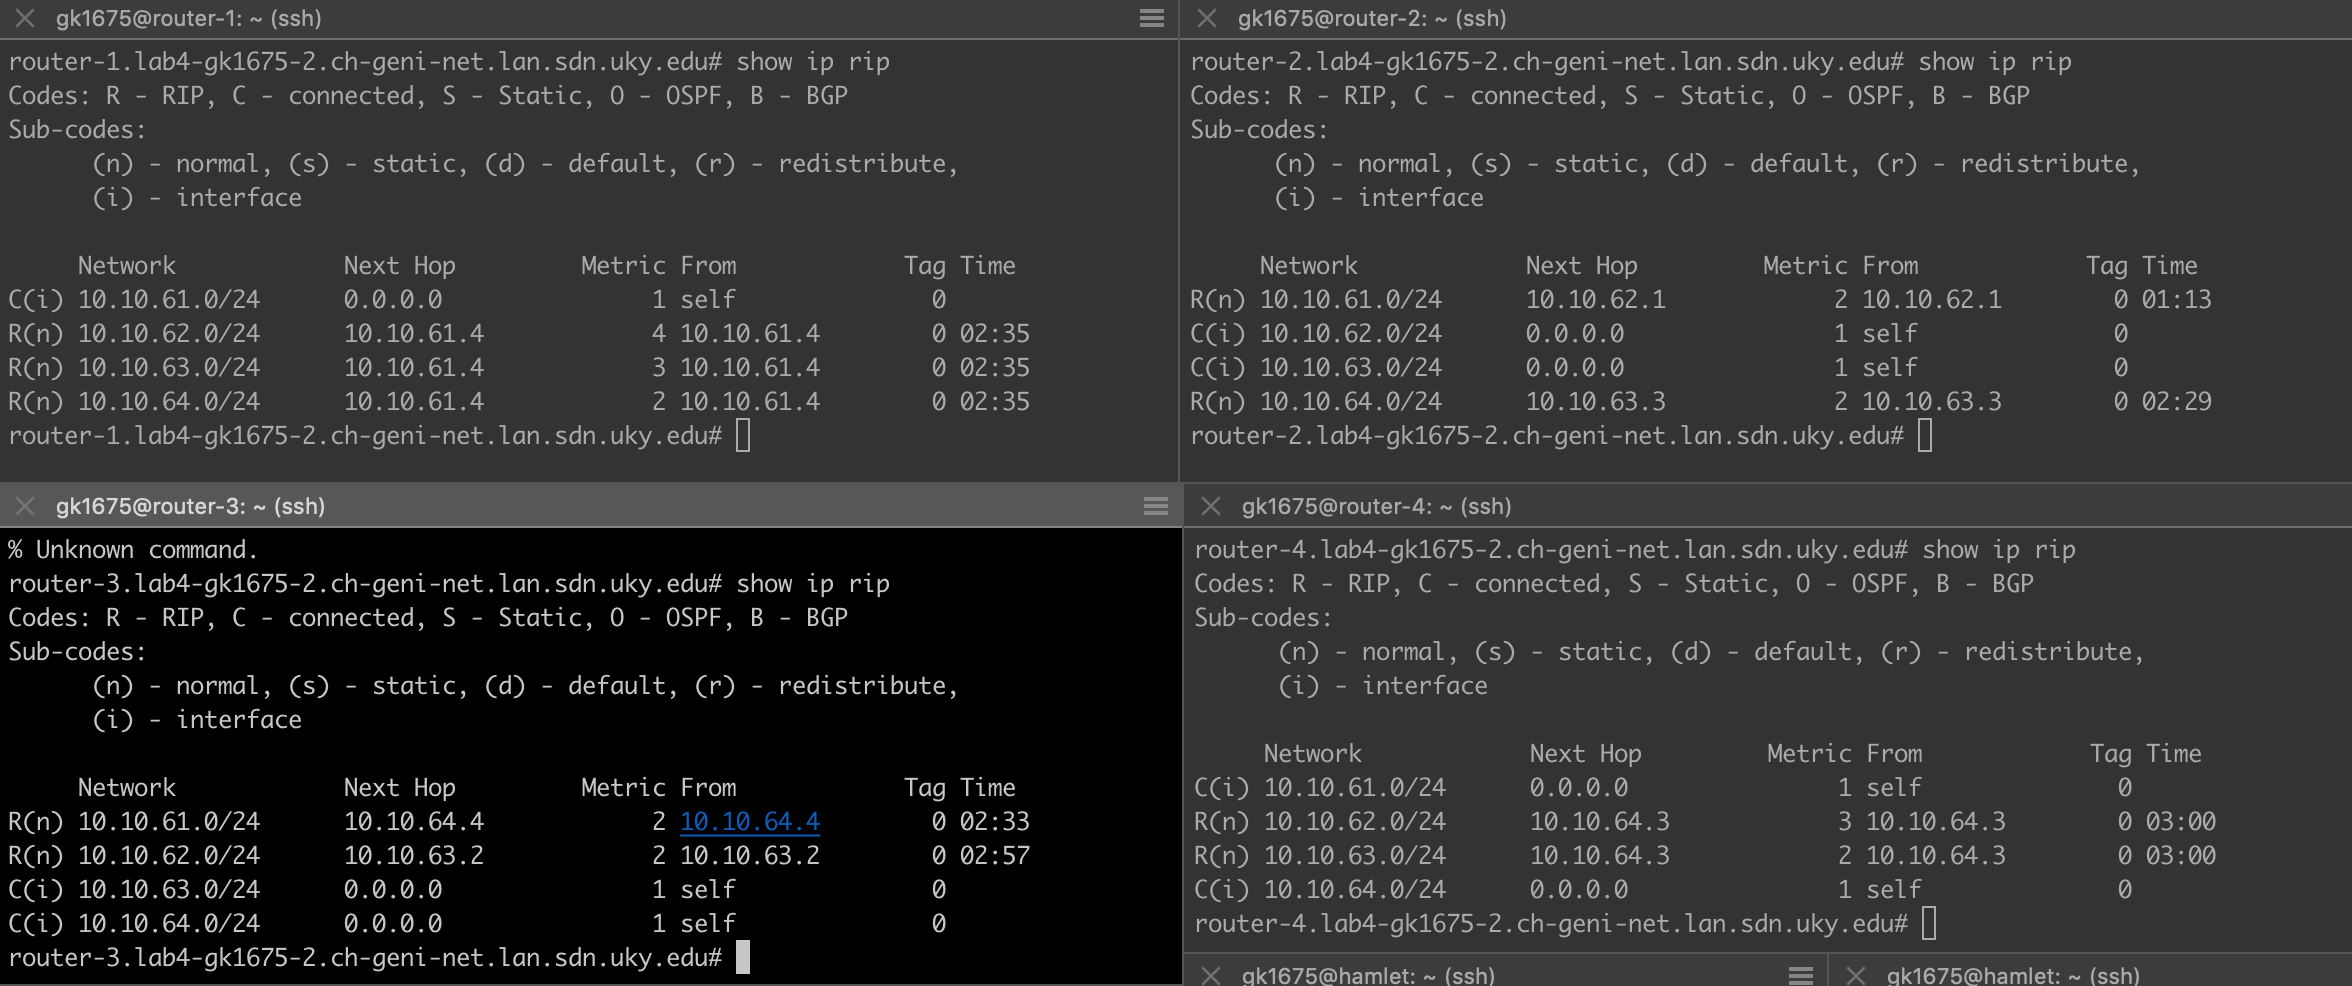

Q: Show the RIP tables you captured at each stage of this exercise. Explain how the routing tables changed when the most direct path between Router 1 and Router 2 was disabled.

A:  
For router-1, the cost to 10.10.62.0 increased to 4, meaning that the message was sent via router 3, 4 and 2 as intermediate hops, to reach the subnet of 10.10.62.0 finally.  
For router-2 and router-3, the routing table was not changed.   
For router-4 the cost to 10.10.62.0 increased to 3, meaning  that the message was sent via router 3 and router 2 as intermediate hops, to reach the subnet of 10.10.62.0.  

Q: Use the tcpdump output to see how long it takes for RIP to alter the routing table after the topology of the network changes. Explain why it takes this time for RIP to react to the route change. Refer to Section 4.2.4 for RIP operation and default timer values.

A: It took about 30 seconds (screenshot below) for RIP to alter the routing table after the topology of the network changes ("romeo"'s request arrives at "hamlet"), as the route-update timer is set as 30 seconds plus a small random interval. 
- route-update timer: 30s
- route-invalid: 180s
- router-hold-down: 180s
- route-flush: 240s

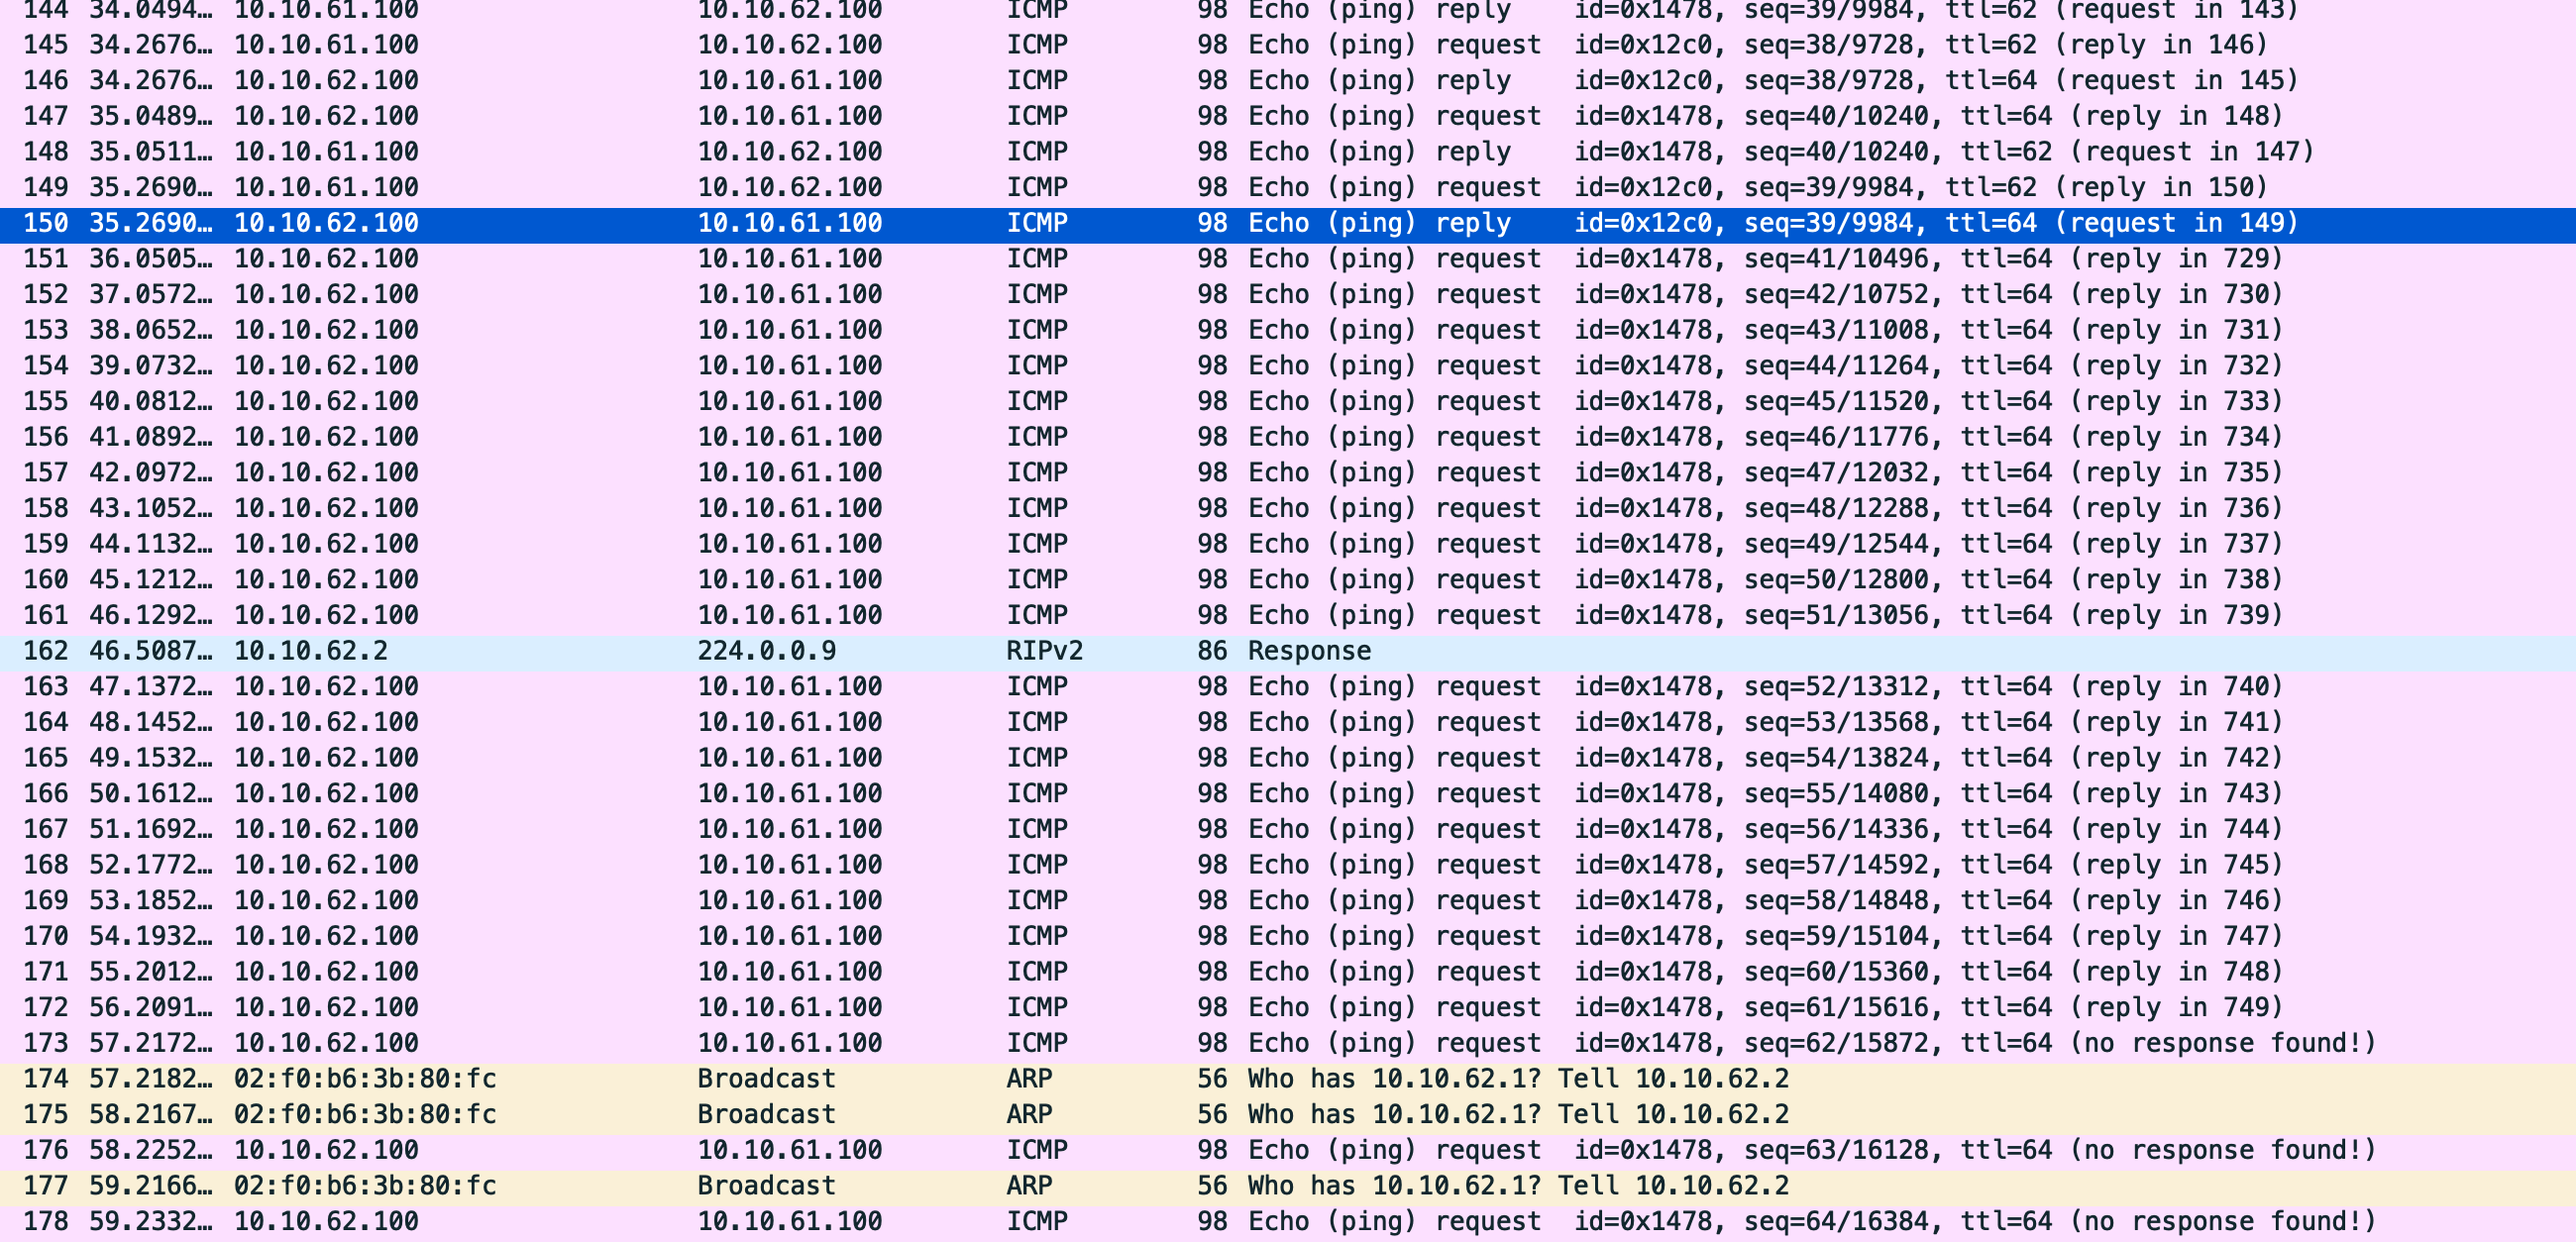

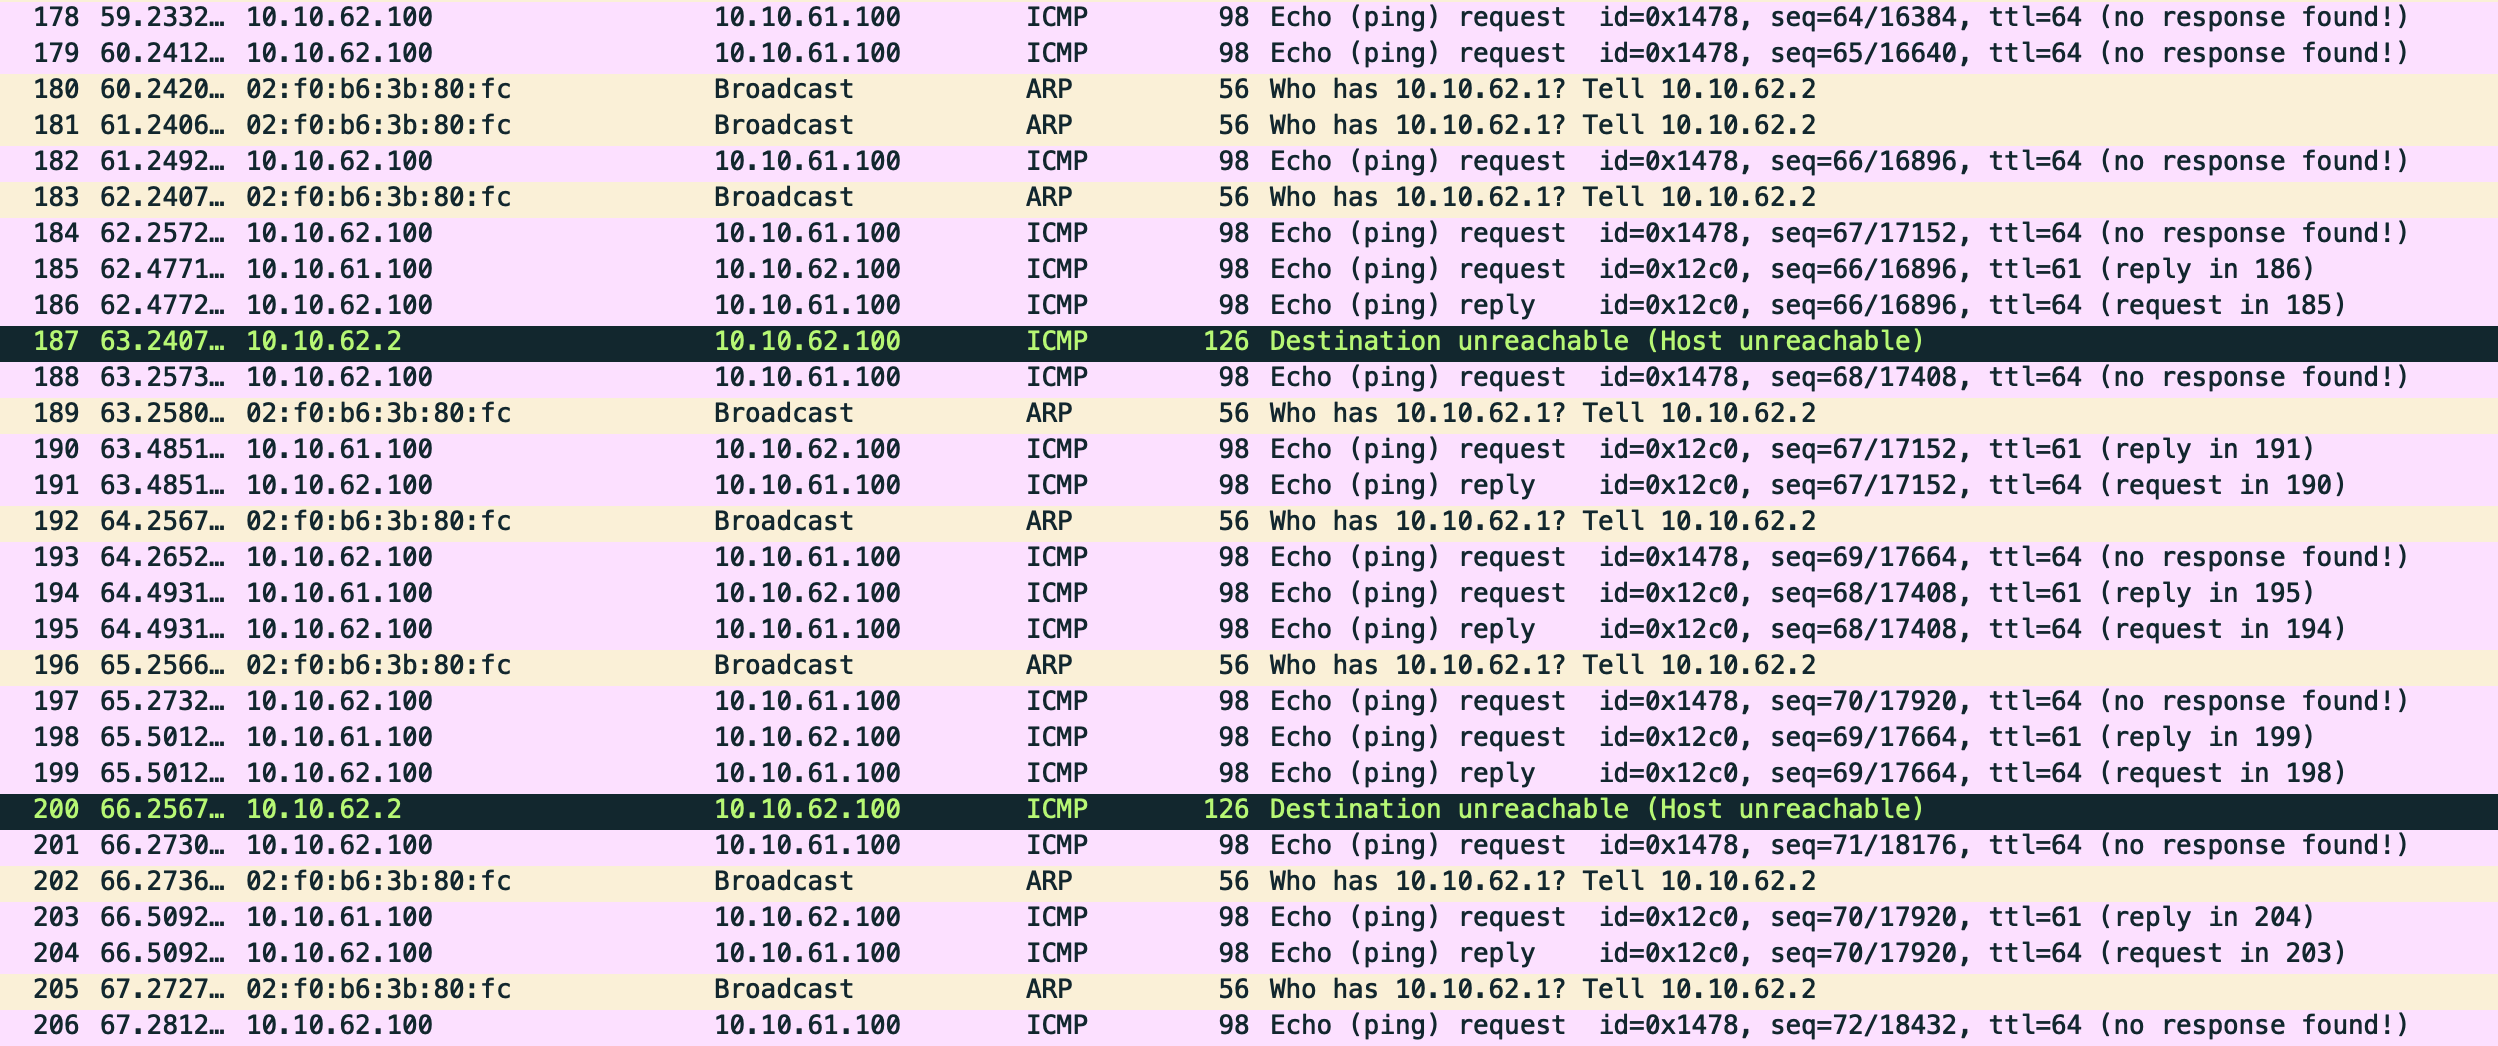

## 4.7 Routing experiments with ICMP
### Exerise 4

romeo: `sudo route add -net 10.10.0.0/16 gw 10.10.61.1`   
petruchio: `sudo route add -net 10.10.0.0/16 gw 10.10.64.4`   

Q: Identify every field in the ICMP redirect message that you captured (see Fig. 4.2).

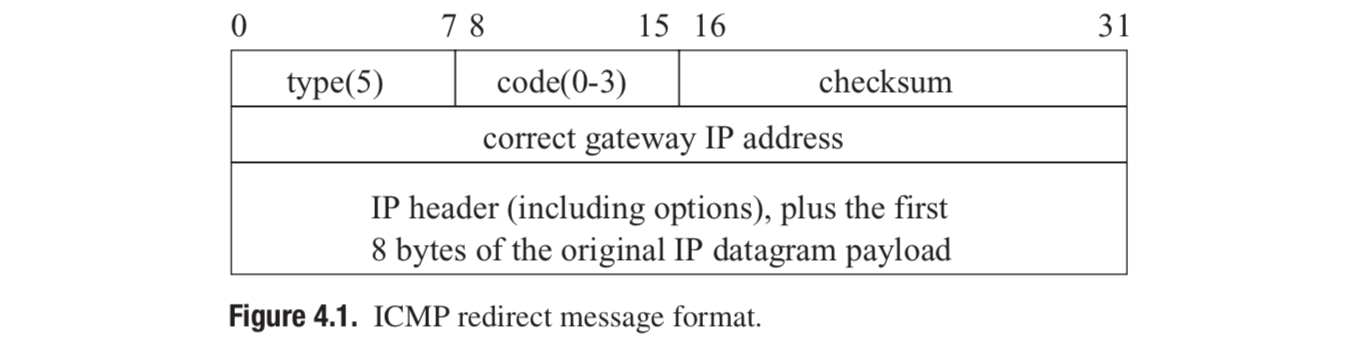

ICMP redirect message:
- type: 5
- code: 0
- correct gateway IP address: 10.10.61.4

Q: Show the traceroute output before and after the ICMP redirect instruction was applied, and explain the change.

Before ICMP redirect instruction was applied

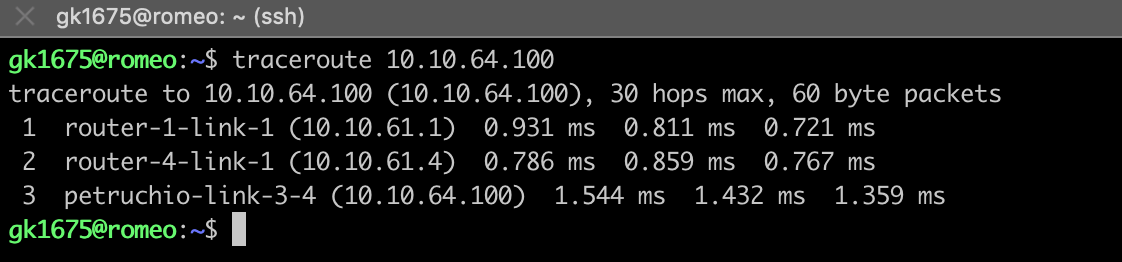

After ICMP redirect instruction was applied

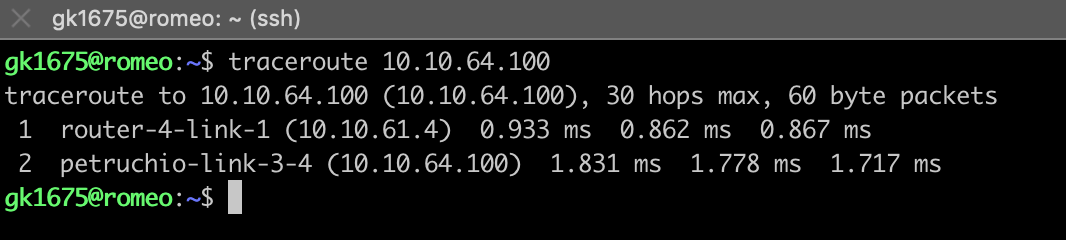

Before ICMP redirect instruction was applied, every package from romeo needs to be sent to router-1, where it is then redirected to router-4; After ICMP redirect instruction was applied, only the first package was sent to router-1, and then the routing table on "romeo" was updated, and all packages afterwards were sent to router 4 directly.

Q: From the tcpdump output, explain how the multi-hop route was found using traceroute. Explain the sequence of the ICMP messages used.

package capture from "juliet"

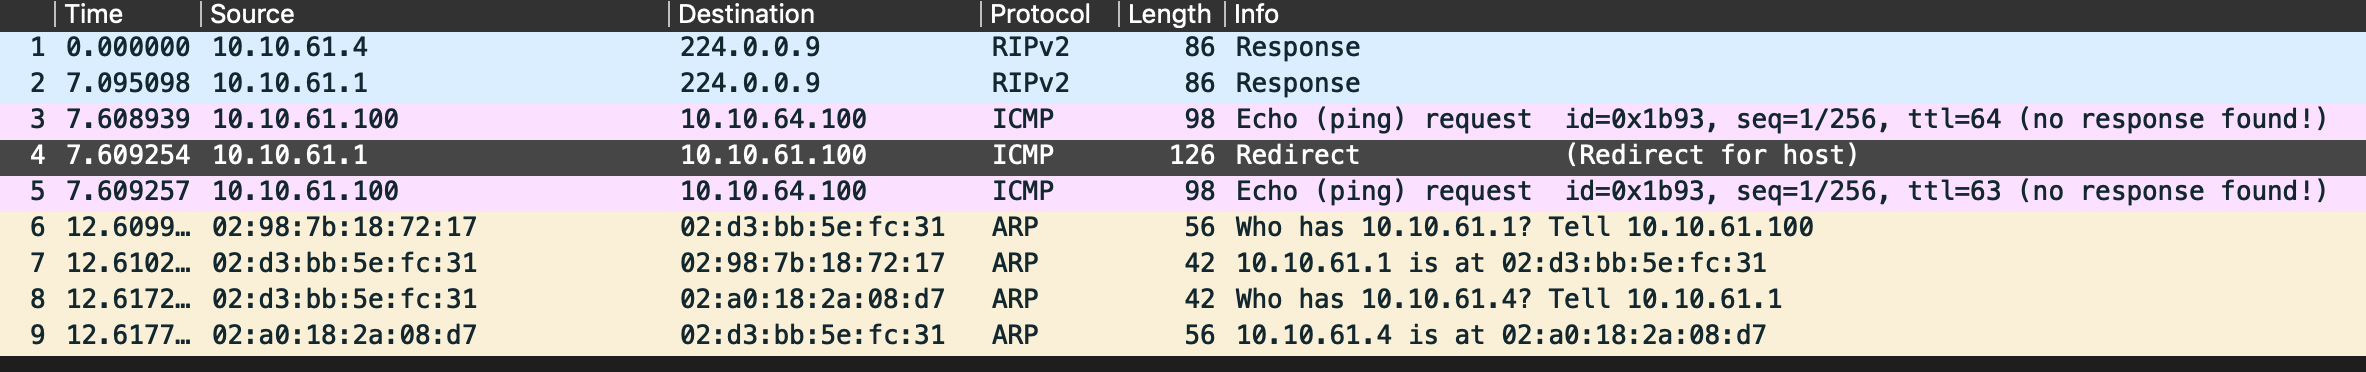

explain how the multi-hop route was found using traceroute
- for each package sent from the source host, the TTL of that package starts from 1 and increase by one each time
- when the first package from "romeo" arrives at router-1 eth2 interface (10.10.61.1), router-1 finds it in its routing table and redirects this package back to eth1 interface
- when "romeo" receives the "redirect" message from router-1, it updates its own routing table 
- the later packages sent from "romeo" goes to router-4 directly, with TTL=2, it reaches "petruchio".
Explain the sequence of the ICMP messages used.
- the first ICMP message is a "ping request" from "romeo"
- the second ICMP message is a "redirect" from router-1 to romeo
- Afterwards, the ICMP message are the normal request and reply between "romeo" and "petruchio"

---
P.S. Resources on GENI deleted.   
The source code of this notebook is committed to [Guandong Kou's GitHub repository](https://github.com/Kou-Guandong/NYU_5373_Internet_Architecture_and_Protocols)